In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the three datasets
customers_df = pd.read_csv('/Users/Mae/Downloads/MLPA_MS1_S3101_Group7/MLPA_MS1_S3101_Group7/customers_data.csv')
products_df = pd.read_csv('/Users/Mae/Downloads/MLPA_MS1_S3101_Group7/MLPA_MS1_S3101_Group7/products_data.csv')
transactions_df = pd.read_csv('/Users/Mae/Downloads/MLPA_MS1_S3101_Group7/MLPA_MS1_S3101_Group7/transactions_data.csv')


In [58]:
print("=" * 80)
print("CUSTOMERS DATASET - STRUCTURE & INFO")
print("=" * 80)

print("\n Column Names:")
print(customers_df.columns.tolist())

print("\n Dataset Info:")
customers_df.info()

print("\n First 5 Rows:")
display(customers_df.head())

print("\n Basic Statistics:")
display(customers_df.describe())

CUSTOMERS DATASET - STRUCTURE & INFO

 Column Names:
['Company_ID', 'Company_Name', 'Company_Profit', 'Address']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company_ID      90 non-null     float64
 1   Company_Name    100 non-null    object 
 2   Company_Profit  88 non-null     float64
 3   Address         100 non-null    object 
dtypes: float64(2), object(2)
memory usage: 3.3+ KB

 First 5 Rows:


,Company_ID,Company_Name,Company_Profit,Address
0,1.0,Tech Enterprises 1,80701.0,"EDSA, Barangay 606, Pasig, Philippines"
1,2.0,Global Partners 2,80511.0,"Commonwealth Ave, Barangay 789, Taguig, Philip..."
2,3.0,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines"
3,4.0,Prime Network 4,NaN,"Alabang-Zapote Rd, Barangay 202, Taguig, Phili..."
4,5.0,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines"



 Basic Statistics:


,Company_ID,Company_Profit
count,90.000000,88.000000
mean,51.944444,76400.500000
std,28.684397,27296.169253
min,1.000000,30663.000000
25%,27.500000,52648.500000
50%,53.500000,75301.500000
75%,76.750000,101089.750000
max,100.000000,118114.000000


In [59]:
# MISSING VALUES ANALYSIS FOR CUSTOMERS DATASET
print("=" * 80)
print(f"MISSING VALUES ANALYSIS: CUSTOMERS DATASET")
print("=" * 80)

# Check for missing values
print("\nMissing Values:")
print(customers_df.isnull().sum())

# Calculate the percentage of missing values for each column
missing_percent = (customers_df.isnull().sum() / len(customers_df)) * 100
print("\nMissing %:")
print(missing_percent)

# Check for duplicate rows
duplicates = customers_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

MISSING VALUES ANALYSIS: CUSTOMERS DATASET

Missing Values:
Company_ID        10
Company_Name       0
Company_Profit    12
Address            0
dtype: int64

Missing %:
Company_ID        10.0
Company_Name       0.0
Company_Profit    12.0
Address            0.0
dtype: float64

Number of duplicate rows: 0


In [60]:
# INCONSISTENCIES & OUTLIERS ANALYSIS FOR CUSTOMERS DATASET
print("=" * 80)
print("INCONSISTENCIES & OUTLIERS ANALYSIS: CUSTOMERS DATASET")
print("=" * 80)

print("\n1. DATA TYPE ISSUES")
print("-" * 80)

print("\nCurrent data types:")
print(customers_df.dtypes)

print(f"\nCompany_ID data type: {customers_df['Company_ID'].dtype}")
if customers_df['Company_ID'].dtype == 'float64':
    has_decimals = (customers_df['Company_ID'] % 1 != 0).sum()
    print(f"  ⚠ Issue: Stored as float (should be integer)")
    print(f"     {has_decimals} rows have decimal values")

print("\n2. ADDRESS FORMATTING ISSUES")
print("-" * 80)

# Check for special characters
special_chars = customers_df[customers_df['Address'].str.contains(r'[!@#$%^]', regex=True, na=False)]
print(f"\nAddresses with special characters (!@#$%^): {len(special_chars)}")
if len(special_chars) > 0:
    print("\nExamples:")
    for i, (idx, row) in enumerate(special_chars.head(3).iterrows()):
        print(f"  {i+1}. {row['Address'][:70]}")

# Check for extra spaces
whitespace_issues = (customers_df['Address'].str.len() != customers_df['Address'].str.strip().str.len()).sum()
print(f"\nAddresses with leading/trailing whitespace: {whitespace_issues}")

print("\n3. PROFIT VALUES & OUTLIER CHECK")
print("-" * 80)

invalid_profit = (customers_df['Company_Profit'] <= 0).sum()
print(f"\nCompanies with profit <= 0: {invalid_profit}")

print(f"\nProfit Distribution (in thousands):")
print(customers_df['Company_Profit'].describe())

print(f"\n⚠ Outlier Check:")
mean_profit = customers_df['Company_Profit'].mean()
std_profit = customers_df['Company_Profit'].std()
print(f"  Mean: ${mean_profit:,.2f}")
print(f"  Std Dev: ${std_profit:,.2f}")
print(f"  Range: ${customers_df['Company_Profit'].min():,.2f} to ${customers_df['Company_Profit'].max():,.2f}")

# Flag potential outliers (significantly higher/lower than average)
high_outliers = customers_df[customers_df['Company_Profit'] > mean_profit + (2 * std_profit)]
low_outliers = customers_df[customers_df['Company_Profit'] < mean_profit - (2 * std_profit)]

print(f"\n  Companies with unusually HIGH profit: {len(high_outliers)}")
if len(high_outliers) > 0:
    print("    (More than 2 standard deviations above average)")
    display(high_outliers[['Company_ID', 'Company_Name', 'Company_Profit']].head())

print(f"\n  Companies with unusually LOW profit: {len(low_outliers)}")
if len(low_outliers) > 0:
    print("    (More than 2 standard deviations below average)")
    display(low_outliers[['Company_ID', 'Company_Name', 'Company_Profit']].head())

INCONSISTENCIES & OUTLIERS ANALYSIS: CUSTOMERS DATASET

1. DATA TYPE ISSUES
--------------------------------------------------------------------------------

Current data types:
Company_ID        float64
Company_Name       object
Company_Profit    float64
Address            object
dtype: object

Company_ID data type: float64
  ⚠ Issue: Stored as float (should be integer)
     10 rows have decimal values

2. ADDRESS FORMATTING ISSUES
--------------------------------------------------------------------------------

Addresses with special characters (!@#$%^): 8

Examples:
  1. Taft Ave, Barangay 606, Makati, Philippines!
  2. Shaw Blvd, Barangay 707, Taguig, Philippines!
  3. Edsa, brgy. 606, makati, philippines!

Addresses with leading/trailing whitespace: 0

3. PROFIT VALUES & OUTLIER CHECK
--------------------------------------------------------------------------------

Companies with profit <= 0: 0

Profit Distribution (in thousands):
count        88.000000
mean      76400.500000
std 

In [61]:
print("=" * 80)
print("PRODUCTS DATASET - STRUCTURE & INFO")
print("=" * 80)

print("\n Column Names:")
print(products_df.columns.tolist())

print("\n Dataset Info:")
products_df.info()

print("\n First 5 Rows:")
display(products_df.head())

print("\n Basic Statistics:")
display(products_df.describe())

PRODUCTS DATASET - STRUCTURE & INFO

 Column Names:
['Product_ID', 'Product_Name', 'Product_Price']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product_ID     18 non-null     float64
 1   Product_Name   20 non-null     object 
 2   Product_Price  20 non-null     object 
dtypes: float64(1), object(2)
memory usage: 612.0+ bytes

 First 5 Rows:


,Product_ID,Product_Name,Product_Price
0,1.0,FinPredictor Suite,"?140,000"
1,2.0,MarketMinder Analytics,"?168,000"
2,3.0,TrendWise Forecaster,"?100,800"
3,4.0,CustomerScope Insights,"?123,200"
4,5.0,SalesSync Optimizer,"?84,000"



 Basic Statistics:


,Product_ID
count,18.000000
mean,10.333333
std,6.077925
min,1.000000
25%,5.250000
50%,10.500000
75%,14.750000
max,20.000000


In [62]:
# MISSING VALUES ANALYSIS FOR PRODUCTS DATASET
print("=" * 80)
print(f"MISSING VALUES ANALYSIS: PRODUCTS DATASET")
print("=" * 80)

# Check for missing values
print("\nMissing Values:")
print(products_df.isnull().sum())

# Calculate the percentage of missing values for each column
missing_percent = (products_df.isnull().sum() / len(products_df)) * 100
print("\nMissing %:")
print(missing_percent)

# Check for duplicate rows
duplicates = products_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

MISSING VALUES ANALYSIS: PRODUCTS DATASET

Missing Values:
Product_ID       2
Product_Name     0
Product_Price    0
dtype: int64

Missing %:
Product_ID       10.0
Product_Name      0.0
Product_Price     0.0
dtype: float64

Number of duplicate rows: 0


In [63]:
# INCONSISTENCIES & OUTLIERS ANALYSIS FOR PRODUCTS DATASET
print("=" * 80)
print("INCONSISTENCIES & OUTLIERS ANALYSIS: PRODUCTS DATASET")
print("=" * 80)

print("\n1. DATA TYPE ISSUES")
print("-" * 80)

print("\nCurrent data types:")
print(products_df.dtypes)

print(f"\nProduct_ID data type: {products_df['Product_ID'].dtype}")
if products_df['Product_ID'].dtype == 'float64':
    has_decimals = (products_df['Product_ID'] % 1 != 0).sum()
    print(f"  ⚠ Issue: Stored as float (should be integer)")
    print(f"     {has_decimals} rows have decimal values")

print(f"\nProduct_Price data type: {products_df['Product_Price'].dtype}")
if products_df['Product_Price'].dtype == 'object':
    print(f"  ⚠ Issue: Stored as TEXT/STRING (should be numeric)")
    print(f"\n  Sample values:")
    for val in products_df['Product_Price'].head(5):
        print(f"    - {val}")
    print(f"\n  Problem: Contains currency symbol (?) and commas")
    print(f"  Cannot perform calculations on text values")

print("\n2. PRODUCT NAMES")
print("-" * 80)

print("\nAll product names:")
for idx, row in products_df.iterrows():
    if pd.notna(row['Product_ID']):  # Only process if Product_ID is not NaN
        print(f" ID {int(row['Product_ID'])}: {row['Product_Name']}")
    else:
        print(f" ID [MISSING]: {row['Product_Name']}")

generic_names = products_df[products_df['Product_Name'].str.contains('Product \\d+', regex=True, na=False)]
if len(generic_names) > 0:
    print(f"\n  ⚠ Note: {len(generic_names)} generic product name(s) detected")

print("\n3. PRICE VALUES & OUTLIER CHECK")
print("-" * 80)

print("\n⚠ Note: Product_Price is currently stored as text.")
print("   Cannot analyze outliers until converted to numeric.")
print("\nAfter converting to numeric, expected price check:")
print("  - Look for unusually high or low prices")
print("  - Flag prices that are significantly different from the average")

INCONSISTENCIES & OUTLIERS ANALYSIS: PRODUCTS DATASET

1. DATA TYPE ISSUES
--------------------------------------------------------------------------------

Current data types:
Product_ID       float64
Product_Name      object
Product_Price     object
dtype: object

Product_ID data type: float64
  ⚠ Issue: Stored as float (should be integer)
     2 rows have decimal values

Product_Price data type: object
  ⚠ Issue: Stored as TEXT/STRING (should be numeric)

  Sample values:
    - ?140,000
    - ?168,000
    - ?100,800
    - ?123,200
    - ?84,000

  Problem: Contains currency symbol (?) and commas
  Cannot perform calculations on text values

2. PRODUCT NAMES
--------------------------------------------------------------------------------

All product names:
 ID 1: FinPredictor Suite
 ID 2: MarketMinder Analytics
 ID 3: TrendWise Forecaster
 ID 4: CustomerScope Insights
 ID 5: SalesSync Optimizer
 ID 6: RevenueVue Dashboard
 ID 7: DataBridge Integration Tool
 ID [MISSING]: RiskRadar M

In [64]:
print("=" * 80)
print("TRANSACTIONS DATASET - STRUCTURE & INFO")
print("=" * 80)

print("\n Column Names:")
print(transactions_df.columns.tolist())

print("\n Dataset Info:")
transactions_df.info()

print("\n First 10 Rows:")
display(transactions_df.head(10))

print("\n Basic Statistics:")
display(transactions_df.describe())

TRANSACTIONS DATASET - STRUCTURE & INFO

 Column Names:
['Unnamed: 0', 'Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity', 'Transaction_Date', 'Product_Price', 'Total_Cost']

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9000 non-null   float64
 1   Transaction_ID    9000 non-null   float64
 2   Company_ID        9000 non-null   float64
 3   Product_ID        9000 non-null   float64
 4   Quantity          9000 non-null   float64
 5   Transaction_Date  10000 non-null  object 
 6   Product_Price     9000 non-null   float64
 7   Total_Cost        9000 non-null   float64
dtypes: float64(7), object(1)
memory usage: 625.1+ KB

 First 10 Rows:


,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,0.0,1.0,88.0,6.0,NaN,2024/03/26,194379.147964,1075200.0
1,1.0,2.0,29.0,19.0,16.0,"July 09, 2024",97930.993380,1428000.0
2,2.0,NaN,28.0,18.0,6.0,04/13/2024,126095.547778,940800.0
3,3.0,4.0,85.0,12.0,12.0,09-06-2023,NaN,1008000.0
4,4.0,5.0,47.0,3.0,8.0,07/06/2021,99575.609634,705600.0
5,5.0,6.0,80.0,11.0,4.0,2021/07/12,160658.675350,627200.0
6,NaN,7.0,NaN,NaN,14.0,2023/11/01,133548.749710,1960000.0
7,7.0,8.0,21.0,20.0,7.0,"October 31, 2023",229217.941468,1792000.0
8,8.0,9.0,96.0,1.0,14.0,25-02-2024,144758.783254,NaN
9,9.0,10.0,3.0,20.0,6.0,29-03-2021,238293.851303,1120000.0



 Basic Statistics:


,Unnamed: 0,Transaction_ID,Company_ID,Product_ID,Quantity,Product_Price,Total_Cost
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9.000000e+03
mean,4994.049111,5005.177556,50.583556,10.446778,10.528778,134652.802537,1.424246e+06
std,2885.331476,2894.971964,28.900870,5.768341,5.808062,39058.106978,9.086274e+05
min,0.000000,1.000000,1.000000,1.000000,0.000000,75613.362923,8.400000e+04
25%,2501.750000,2491.750000,25.000000,5.000000,6.000000,100686.369472,6.720000e+05
50%,4997.500000,5005.000000,50.000000,10.000000,11.000000,131297.783516,1.344000e+06
75%,7477.250000,7527.250000,76.000000,15.000000,16.000000,162221.485713,1.965600e+06
max,9999.000000,9999.000000,100.000000,20.000000,21.000000,246279.050335,4.480000e+06


In [65]:
# MISSING VALUES ANALYSIS FOR TRANSACTIONS DATASET
print("=" * 80)
print(f"MISSING VALUES ANALYSIS: TRANSACTIONS DATASET")
print("=" * 80)

# Check for missing values
print("\nMissing Values:")
print(transactions_df.isnull().sum())

# Calculate the percentage of missing values for each column
missing_percent = (transactions_df.isnull().sum() / len(transactions_df)) * 100
print("\nMissing %:")
print(missing_percent)

# Check for duplicate rows
duplicates = transactions_df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

MISSING VALUES ANALYSIS: TRANSACTIONS DATASET

Missing Values:
Unnamed: 0          1000
Transaction_ID      1000
Company_ID          1000
Product_ID          1000
Quantity            1000
Transaction_Date       0
Product_Price       1000
Total_Cost          1000
dtype: int64

Missing %:
Unnamed: 0          10.0
Transaction_ID      10.0
Company_ID          10.0
Product_ID          10.0
Quantity            10.0
Transaction_Date     0.0
Product_Price       10.0
Total_Cost          10.0
dtype: float64

Number of duplicate rows: 0


In [66]:
# INCONSISTENCIES & OUTLIERS ANALYSIS FOR TRANSACTIONS DATASET
print("=" * 80)
print("INCONSISTENCIES & OUTLIERS ANALYSIS: TRANSACTIONS DATASET")
print("=" * 80)

print("\n1. DATE FORMAT INCONSISTENCIES")
print("-" * 80)

print("\nSample of Transaction_Date values (first 15):")
sample_dates = transactions_df['Transaction_Date'].head(15)
for idx, date in enumerate(sample_dates, 1):
    print(f"  {idx:2d}. {date}")

print("\n  ⚠ Issue: Multiple date formats detected")
print("     - YYYY/MM/DD (e.g., 2024/03/26)")
print("     - Month DD, YYYY (e.g., July 09, 2024)")
print("     - MM-DD-YYYY (e.g., 09-06-2023)")
print("     - DD-MM-YYYY (e.g., 25-02-2024)")
print("     - MM/DD/YYYY (e.g., 07/06/2021)")
print("\n  Problem: Cannot reliably parse or sort dates")

print("\n2. QUANTITY - INCONSISTENCIES & OUTLIER CHECK")
print("-" * 80)

print("\nQuantity statistics:")
print(transactions_df['Quantity'].describe().to_string())

zero_qty = (transactions_df['Quantity'] == 0).sum()
negative_qty = (transactions_df['Quantity'] < 0).sum()

print(f"\nProblematic quantities:")
print(f"  - Transactions with Quantity = 0: {zero_qty}")
print(f"  - Transactions with Quantity < 0: {negative_qty}")

if zero_qty > 0 or negative_qty > 0:
    print(f"\n  ⚠ Issue: {zero_qty + negative_qty} invalid transactions")
    print(f"     Cannot have 0 or negative quantities")

# Outlier check for quantity
mean_qty = transactions_df['Quantity'].mean()
std_qty = transactions_df['Quantity'].std()
print(f"\n⚠ Outlier Check:")
print(f"  Mean Quantity: {mean_qty:.2f}")
print(f"  Std Dev: {std_qty:.2f}")
print(f"  Range: {transactions_df['Quantity'].min():.0f} to {transactions_df['Quantity'].max():.0f}")

high_qty = transactions_df[transactions_df['Quantity'] > mean_qty + (2 * std_qty)]
print(f"\n  Transactions with unusually HIGH quantity: {len(high_qty)}")
if len(high_qty) > 0:
    print("    (More than 2 standard deviations above average)")
    display(high_qty[['Transaction_ID', 'Company_ID', 'Quantity']].head())

print("\n3. TOTAL_COST - INCONSISTENCIES & OUTLIER CHECK")
print("-" * 80)

print("\nTotal_Cost statistics:")
print(transactions_df['Total_Cost'].describe().to_string())

zero_cost = (transactions_df['Total_Cost'] == 0).sum()
negative_cost = (transactions_df['Total_Cost'] < 0).sum()

print(f"\nProblematic costs:")
print(f"  - Transactions with Total_Cost = 0: {zero_cost}")
print(f"  - Transactions with Total_Cost < 0: {negative_cost}")

if zero_cost > 0 or negative_cost > 0:
    print(f"\n  ⚠ Issue: {zero_cost + negative_cost} invalid transactions")
    print(f"     Cannot have 0 or negative costs")

# Outlier check for cost
mean_cost = transactions_df['Total_Cost'].mean()
std_cost = transactions_df['Total_Cost'].std()
print(f"\n⚠ Outlier Check:")
print(f"  Mean Total_Cost: ${mean_cost:,.2f}")
print(f"  Std Dev: ${std_cost:,.2f}")
print(f"  Range: ${transactions_df['Total_Cost'].min():,.2f} to ${transactions_df['Total_Cost'].max():,.2f}")

high_cost = transactions_df[transactions_df['Total_Cost'] > mean_cost + (2 * std_cost)]
print(f"\n  Transactions with unusually HIGH cost: {len(high_cost)}")
if len(high_cost) > 0:
    print("    (More than 2 standard deviations above average)")
    display(high_cost[['Transaction_ID', 'Company_ID', 'Total_Cost']].head())

print("\n4. DATA TYPE ISSUES")
print("-" * 80)

print("\nCurrent data types:")
print(transactions_df.dtypes.to_string())

print(f"\n⚠ Issues:")
id_cols = ['Transaction_ID', 'Company_ID', 'Product_ID']
for col in id_cols:
    if col in transactions_df.columns:
        if transactions_df[col].dtype == 'float64':
            print(f"  - {col}: stored as float (should be integer)")

if transactions_df['Transaction_Date'].dtype == 'object':
    print(f"  - Transaction_Date: stored as text (should be datetime)")

INCONSISTENCIES & OUTLIERS ANALYSIS: TRANSACTIONS DATASET

1. DATE FORMAT INCONSISTENCIES
--------------------------------------------------------------------------------

Sample of Transaction_Date values (first 15):
   1. 2024/03/26
   2. July 09, 2024
   3. 04/13/2024
   4. 09-06-2023
   5. 07/06/2021
   6. 2021/07/12
   7. 2023/11/01
   8. October 31, 2023
   9. 25-02-2024
  10. 29-03-2021
  11. 01/12/2024
  12. 05-04-2022
  13. 02/27/2023
  14. 22-03-2023
  15. 22-03-2023

  ⚠ Issue: Multiple date formats detected
     - YYYY/MM/DD (e.g., 2024/03/26)
     - Month DD, YYYY (e.g., July 09, 2024)
     - MM-DD-YYYY (e.g., 09-06-2023)
     - DD-MM-YYYY (e.g., 25-02-2024)
     - MM/DD/YYYY (e.g., 07/06/2021)

  Problem: Cannot reliably parse or sort dates

2. QUANTITY - INCONSISTENCIES & OUTLIER CHECK
--------------------------------------------------------------------------------

Quantity statistics:
count    9000.000000
mean       10.528778
std         5.808062
min         0.000000
2

,Transaction_ID,Company_ID,Total_Cost
19,20.0,52.0,3808000.0
70,71.0,48.0,3332000.0
96,97.0,57.0,3724000.0
112,113.0,7.0,3528000.0
118,119.0,36.0,3808000.0



4. DATA TYPE ISSUES
--------------------------------------------------------------------------------

Current data types:
Unnamed: 0          float64
Transaction_ID      float64
Company_ID          float64
Product_ID          float64
Quantity            float64
Transaction_Date     object
Product_Price       float64
Total_Cost          float64

⚠ Issues:
  - Transaction_ID: stored as float (should be integer)
  - Company_ID: stored as float (should be integer)
  - Product_ID: stored as float (should be integer)
  - Transaction_Date: stored as text (should be datetime)


In [67]:
# HANDLING MISSING VALUES IN CUSTOMERS DATASET
print("=" * 80)
print("HANDLING MISSING VALUES IN CUSTOMERS DATASET")
print("=" * 80)

# Make a copy to preserve original
customers_cleaned = customers_df.copy()

print("Before handling:")
print(f"Total rows: {len(customers_cleaned)}")
print(f"Missing Company_ID: {customers_cleaned['Company_ID'].isnull().sum()}")
print(f"Missing Company_Profit: {customers_cleaned['Company_Profit'].isnull().sum()}")

# Drop rows with missing Company_ID (primary key)
customers_cleaned = customers_cleaned.dropna(subset=['Company_ID'])

# Fill missing Company_Profit with median
median_profit = customers_cleaned['Company_Profit'].median()
customers_cleaned['Company_Profit'].fillna(median_profit, inplace=True)

print("\nAfter handling:")
print(f"Total rows: {len(customers_cleaned)}")
print(f"Missing Company_ID: {customers_cleaned['Company_ID'].isnull().sum()}")
print(f"Missing Company_Profit: {customers_cleaned['Company_Profit'].isnull().sum()}")
print(f"\nMedian profit used for imputation: {median_profit:.2f}")

HANDLING MISSING VALUES IN CUSTOMERS DATASET
Before handling:
Total rows: 100
Missing Company_ID: 10
Missing Company_Profit: 12

After handling:
Total rows: 90
Missing Company_ID: 0
Missing Company_Profit: 0

Median profit used for imputation: 74653.00


C:\Users\Mae\AppData\Local\Temp\ipykernel_22680\3177145947.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_cleaned['Company_Profit'].fillna(median_profit, inplace=True)


In [68]:
# HANDLING MISSING VALUES IN PRODUCTS DATASET
print("=" * 80)
print("HANDLING MISSING VALUES IN PRODUCTS DATASET")
print("=" * 80)

# Make a copy to preserve original
products_cleaned = products_df.copy()

print("Before handling:")
print(f"Total rows: {len(products_cleaned)}")
print(f"Missing Product_ID: {products_cleaned['Product_ID'].isnull().sum()}")

# Drop rows with missing Product_ID (primary key)
products_cleaned = products_cleaned.dropna(subset=['Product_ID'])

print("\nAfter handling:")
print(f"Total rows: {len(products_cleaned)}")
print(f"Missing Product_ID: {products_cleaned['Product_ID'].isnull().sum()}")

HANDLING MISSING VALUES IN PRODUCTS DATASET
Before handling:
Total rows: 20
Missing Product_ID: 2

After handling:
Total rows: 18
Missing Product_ID: 0


In [69]:
# HANDLING MISSING VALUES IN TRANSACTIONS DATASET
print("=" * 80)
print("HANDLING MISSING VALUES IN TRANSACTIONS DATASET")
print("=" * 80)

# Make a copy to preserve original
transactions_cleaned = transactions_df.copy()

print("Before handling:")
print(f"Total rows: {len(transactions_cleaned)}")
print("\nMissing values:")
print(transactions_cleaned.isnull().sum())

# Drop the 'Unnamed: 0' column (it's just an index)
transactions_cleaned = transactions_cleaned.drop('Unnamed: 0', axis=1)

# Drop rows with missing critical IDs (Transaction_ID, Company_ID, Product_ID)
transactions_cleaned = transactions_cleaned.dropna(subset=['Transaction_ID', 'Company_ID', 'Product_ID'])

# Fill missing Quantity with median
median_quantity = transactions_cleaned['Quantity'].median()
transactions_cleaned['Quantity'].fillna(median_quantity, inplace=True)

# Fill missing Product_Price with median
median_price = transactions_cleaned['Product_Price'].median()
transactions_cleaned['Product_Price'].fillna(median_price, inplace=True)

# Fill missing Total_Cost with median
median_total = transactions_cleaned['Total_Cost'].median()
transactions_cleaned['Total_Cost'].fillna(median_total, inplace=True)

print("\nAfter handling:")
print(f"Total rows: {len(transactions_cleaned)}")
print("\nMissing values:")
print(transactions_cleaned.isnull().sum())
print(f"\nMedian values used:")
print(f"  Quantity: {median_quantity:.2f}")
print(f"  Product_Price: {median_price:.2f}")
print(f"  Total_Cost: {median_total:.2f}")

HANDLING MISSING VALUES IN TRANSACTIONS DATASET
Before handling:
Total rows: 10000

Missing values:
Unnamed: 0          1000
Transaction_ID      1000
Company_ID          1000
Product_ID          1000
Quantity            1000
Transaction_Date       0
Product_Price       1000
Total_Cost          1000
dtype: int64

After handling:
Total rows: 7277

Missing values:
Transaction_ID      0
Company_ID          0
Product_ID          0
Quantity            0
Transaction_Date    0
Product_Price       0
Total_Cost          0
dtype: int64

Median values used:
  Quantity: 10.00
  Product_Price: 130556.44
  Total_Cost: 1344000.00


C:\Users\Mae\AppData\Local\Temp\ipykernel_22680\768780272.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  transactions_cleaned['Quantity'].fillna(median_quantity, inplace=True)
C:\Users\Mae\AppData\Local\Temp\ipykernel_22680\768780272.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

In [70]:
# HANDLING INCONSISTENCIES IN CUSTOMERS DATASET
print("=" * 80)
print("HANDLING INCONSISTENCIES: CUSTOMERS DATASET")
print("=" * 80)

print("\n1. Converting Company_ID to integer")
customers_cleaned['Company_ID'] = customers_cleaned['Company_ID'].astype(int)
print("   ✓ Done")

print("\n2. Removing special characters from addresses")
print("\n2. Removing special characters from addresses")
# Remove special characters the lengthy way
customers_cleaned['Address'] = customers_cleaned['Address'].str.replace('!', '')
customers_cleaned['Address'] = customers_cleaned['Address'].str.replace('@', '')
customers_cleaned['Address'] = customers_cleaned['Address'].str.replace('#', '')
customers_cleaned['Address'] = customers_cleaned['Address'].str.replace('$', '')
customers_cleaned['Address'] = customers_cleaned['Address'].str.replace('%', '')
customers_cleaned['Address'] = customers_cleaned['Address'].str.replace('^', '')
customers_cleaned['Address'] = customers_cleaned['Address'].str.strip()
print("   ✓ Done")
customers_cleaned['Address'] = customers_cleaned['Address'].str.strip()
print("   ✓ Done")

print("\n3. Decision on profit outliers")
print("   Note: Unusually high/low profits are NOT being removed.")
print("   These may represent real business variations and are valuable for modeling.")
print("   ✓ Keeping all valid profit values")

print(f"\nSummary:")
print(f"  Total rows: {len(customers_cleaned)}")
print(f"  Company_ID type: {customers_cleaned['Company_ID'].dtype}")

print("\nSample of cleaned data:")
display(customers_cleaned.head())

HANDLING INCONSISTENCIES: CUSTOMERS DATASET

1. Converting Company_ID to integer
   ✓ Done

2. Removing special characters from addresses

2. Removing special characters from addresses
   ✓ Done
   ✓ Done

3. Decision on profit outliers
   Note: Unusually high/low profits are NOT being removed.
   These may represent real business variations and are valuable for modeling.
   ✓ Keeping all valid profit values

Summary:
  Total rows: 90
  Company_ID type: int64

Sample of cleaned data:


,Company_ID,Company_Name,Company_Profit,Address
0,1,Tech Enterprises 1,80701.0,"EDSA, Barangay 606, Pasig, Philippines"
1,2,Global Partners 2,80511.0,"Commonwealth Ave, Barangay 789, Taguig, Philip..."
2,3,Quantum Associates 3,110664.0,"Roxas Blvd, Barangay 505, Pasig, Philippines"
3,4,Prime Network 4,74653.0,"Alabang-Zapote Rd, Barangay 202, Taguig, Phili..."
4,5,Elite Ventures 5,69427.0,"Ayala Avenue, Barangay 101, Makati, Philippines"


In [71]:
# HANDLING INCONSISTENCIES IN PRODUCTS DATASET
print("=" * 80)
print("HANDLING INCONSISTENCIES: PRODUCTS DATASET")
print("=" * 80)

print("\n1. Converting Product_ID to integer")
products_cleaned['Product_ID'] = products_cleaned['Product_ID'].astype(int)
print("   ✓ Done")

print("\n2. Converting Product_Price from string to numeric")
products_cleaned['Product_Price'] = products_cleaned['Product_Price'].str.replace('?', '', regex=False)
products_cleaned['Product_Price'] = products_cleaned['Product_Price'].str.replace(',', '', regex=False)
products_cleaned['Product_Price'] = pd.to_numeric(products_cleaned['Product_Price'], errors='coerce')
print("   ✓ Done")

print("\n3. Outlier analysis for Product_Price")
mean_price = products_cleaned['Product_Price'].mean()
std_price = products_cleaned['Product_Price'].std()
print(f"   Mean Price: ${mean_price:,.2f}")
print(f"   Std Dev: ${std_price:,.2f}")
print(f"   Note: Keeping all price outliers (no removal)")
print(f"   Price variations may reflect product tier differences")
print("   ✓ Keeping all valid prices")

print(f"\nSummary:")
print(f"  Total rows: {len(products_cleaned)}")
print(f"  Product_ID type: {products_cleaned['Product_ID'].dtype}")
print(f"  Product_Price type: {products_cleaned['Product_Price'].dtype}")
print(f"  Price range: ${products_cleaned['Product_Price'].min():,.2f} to ${products_cleaned['Product_Price'].max():,.2f}")

print("\nSample of cleaned data:")
display(products_cleaned.head())

HANDLING INCONSISTENCIES: PRODUCTS DATASET

1. Converting Product_ID to integer
   ✓ Done

2. Converting Product_Price from string to numeric
   ✓ Done

3. Outlier analysis for Product_Price
   Mean Price: $135,333.33
   Std Dev: $40,892.86
   Note: Keeping all price outliers (no removal)
   Price variations may reflect product tier differences
   ✓ Keeping all valid prices

Summary:
  Total rows: 18
  Product_ID type: int64
  Product_Price type: int64
  Price range: $84,000.00 to $224,000.00

Sample of cleaned data:


,Product_ID,Product_Name,Product_Price
0,1,FinPredictor Suite,140000
1,2,MarketMinder Analytics,168000
2,3,TrendWise Forecaster,100800
3,4,CustomerScope Insights,123200
4,5,SalesSync Optimizer,84000


In [72]:
# HANDLING INCONSISTENCIES IN TRANSACTIONS DATASET - PART 1
print("=" * 80)
print("HANDLING INCONSISTENCIES: TRANSACTIONS DATASET - PART 1")
print("=" * 80)

print("\n1. Converting IDs to integer")
transactions_cleaned['Transaction_ID'] = transactions_cleaned['Transaction_ID'].astype(int)
transactions_cleaned['Company_ID'] = transactions_cleaned['Company_ID'].astype(int)
transactions_cleaned['Product_ID'] = transactions_cleaned['Product_ID'].astype(int)
print("   ✓ Done")

print("\n2. Standardizing Transaction_Date to YYYY-MM-DD format")

def parse_date(date_str):
    '''Try multiple date formats to parse dates'''
    if pd.isna(date_str):
        return pd.NaT
    
    date_str = str(date_str).strip()
    
    # Try different formats
    formats = [
        '%Y/%m/%d',      # 2024/03/26
        '%B %d, %Y',     # July 09, 2024
        '%m-%d-%Y',      # 09-06-2023
        '%d-%m-%Y',      # 25-02-2024
        '%m/%d/%Y',      # 07/06/2021
    ]
    
    for fmt in formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    
    # If all formats fail
    try:
        return pd.to_datetime(date_str, infer_datetime_format=True)
    except:
        return pd.NaT

transactions_cleaned['Transaction_Date'] = transactions_cleaned['Transaction_Date'].apply(parse_date)
print("   ✓ Done")

print(f"\nDate parsing results:")
successful = transactions_cleaned['Transaction_Date'].notna().sum()
failed = transactions_cleaned['Transaction_Date'].isna().sum()
print(f"  - Successfully parsed: {successful} dates")
print(f"  - Failed to parse: {failed} dates")
print(f"\nDate range: {transactions_cleaned['Transaction_Date'].min()} to {transactions_cleaned['Transaction_Date'].max()}")

HANDLING INCONSISTENCIES: TRANSACTIONS DATASET - PART 1

1. Converting IDs to integer
   ✓ Done

2. Standardizing Transaction_Date to YYYY-MM-DD format
   ✓ Done

Date parsing results:
  - Successfully parsed: 7277 dates
  - Failed to parse: 0 dates

Date range: 2020-01-11 00:00:00 to 2024-12-10 00:00:00


In [73]:
# HANDLING INCONSISTENCIES IN TRANSACTIONS DATASET - PART 2
print("=" * 80)
print("HANDLING INCONSISTENCIES: TRANSACTIONS DATASET - PART 2")
print("=" * 80)

before = len(transactions_cleaned)
print(f"\nStarting rows: {before}")

print("\nRemoving rows with invalid data...")

# Remove rows with failed date parsing
invalid_dates = transactions_cleaned['Transaction_Date'].isna().sum()
if invalid_dates > 0:
    print(f"  - Removing {invalid_dates} rows with dates that couldn't be parsed")
    transactions_cleaned = transactions_cleaned[transactions_cleaned['Transaction_Date'].notna()]

# Get valid IDs from cleaned master tables
valid_customer_ids = set(customers_cleaned['Company_ID'].astype(int))
valid_product_ids = set(products_cleaned['Product_ID'].astype(int))

# Remove rows with invalid Company_ID
before_fk = len(transactions_cleaned)
transactions_cleaned = transactions_cleaned[transactions_cleaned['Company_ID'].isin(valid_customer_ids)]
invalid_company = before_fk - len(transactions_cleaned)
if invalid_company > 0:
    print(f"  - Removing {invalid_company} rows with invalid Company_ID")

# Remove rows with invalid Product_ID
before_fk = len(transactions_cleaned)
transactions_cleaned = transactions_cleaned[transactions_cleaned['Product_ID'].isin(valid_product_ids)]
invalid_product = before_fk - len(transactions_cleaned)
if invalid_product > 0:
    print(f"  - Removing {invalid_product} rows with invalid Product_ID")

# Remove rows with zero or negative quantity
before_qty = len(transactions_cleaned)
transactions_cleaned = transactions_cleaned[transactions_cleaned['Quantity'] > 0]
invalid_qty = before_qty - len(transactions_cleaned)
if invalid_qty > 0:
    print(f"  - Removing {invalid_qty} rows with zero or negative Quantity")

# Remove rows with zero or negative total cost
before_cost = len(transactions_cleaned)
transactions_cleaned = transactions_cleaned[transactions_cleaned['Total_Cost'] > 0]
invalid_cost = before_cost - len(transactions_cleaned)
if invalid_cost > 0:
    print(f"  - Removing {invalid_cost} rows with zero or negative Total_Cost")

print("\n3. Quantity & Cost Outlier Decision")
print("   Note: Unusually high quantities and costs are NOT being removed.")
print("   These may represent important business transactions (bulk orders, premium sales).")
print("   ✓ Keeping all valid quantity and cost values")

print("\n4. Rounding Product_Price to 2 decimal places")
transactions_cleaned['Product_Price'] = transactions_cleaned['Product_Price'].round(2)
print("   ✓ Done")

removed = before - len(transactions_cleaned)
print(f"\nClean-up Summary:")
print(f"  Before: {before} rows")
print(f"  After:  {len(transactions_cleaned)} rows")
print(f"  Removed: {removed} rows ({removed/before*100:.1f}%)")

print("\nData types after cleaning:")
print(transactions_cleaned.dtypes.to_string())

print("\nSample of cleaned data:")
display(transactions_cleaned.head(10))

HANDLING INCONSISTENCIES: TRANSACTIONS DATASET - PART 2

Starting rows: 7277

Removing rows with invalid data...
  - Removing 721 rows with invalid Company_ID
  - Removing 655 rows with invalid Product_ID
  - Removing 83 rows with zero or negative Quantity

3. Quantity & Cost Outlier Decision
   Note: Unusually high quantities and costs are NOT being removed.
   These may represent important business transactions (bulk orders, premium sales).
   ✓ Keeping all valid quantity and cost values

4. Rounding Product_Price to 2 decimal places
   ✓ Done

Clean-up Summary:
  Before: 7277 rows
  After:  5818 rows
  Removed: 1459 rows (20.0%)

Data types after cleaning:
Transaction_ID               int64
Company_ID                   int64
Product_ID                   int64
Quantity                   float64
Transaction_Date    datetime64[ns]
Product_Price              float64
Total_Cost                 float64

Sample of cleaned data:


,Transaction_ID,Company_ID,Product_ID,Quantity,Transaction_Date,Product_Price,Total_Cost
0,1,88,6,10.0,2024-03-26,194379.15,1075200.0
1,2,29,19,16.0,2024-07-09,97930.99,1428000.0
3,4,85,12,12.0,2023-09-06,130556.44,1008000.0
4,5,47,3,8.0,2021-07-06,99575.61,705600.0
5,6,80,11,4.0,2021-07-12,160658.68,627200.0
7,8,21,20,7.0,2023-10-31,229217.94,1792000.0
8,9,96,1,14.0,2024-02-25,144758.78,1344000.0
9,10,3,20,6.0,2021-03-29,238293.85,1120000.0
14,15,66,12,17.0,2023-03-22,79380.52,1428000.0
15,16,43,7,1.0,2023-07-24,130556.44,302400.0


In [74]:
# Save the cleaned datasets
customers_cleaned.to_csv('customers_data_cleaned.csv', index=False)
products_cleaned.to_csv('products_data_cleaned.csv', index=False)
transactions_cleaned.to_csv('transactions_data_cleaned.csv', index=False)

print("=" * 80)
print("✓ All data cleaned and saved!")
print("=" * 80)

print("\nFiles created:")
print("  - customers_data_cleaned.csv")
print("  - products_data_cleaned.csv")
print("  - transactions_data_cleaned.csv")

print(f"\nFinal Dataset Summary:")
print(f"  Customers:    {len(customers_cleaned)} companies")
print(f"  Products:     {len(products_cleaned)} products")
print(f"  Transactions: {len(transactions_cleaned)} transactions")

print(f"\nOutlier Handling Decision:")
print(f"  - Profit outliers: KEPT (may represent real business variation)")
print(f"  - Price outliers: KEPT (may reflect product tier differences)")
print(f"  - Quantity outliers: KEPT (bulk orders are valid)")
print(f"  - Cost outliers: KEPT (high-value transactions are important)")


✓ All data cleaned and saved!

Files created:
  - customers_data_cleaned.csv
  - products_data_cleaned.csv
  - transactions_data_cleaned.csv

Final Dataset Summary:
  Customers:    90 companies
  Products:     18 products
  Transactions: 5818 transactions

Outlier Handling Decision:
  - Profit outliers: KEPT (may represent real business variation)
  - Price outliers: KEPT (may reflect product tier differences)
  - Quantity outliers: KEPT (bulk orders are valid)
  - Cost outliers: KEPT (high-value transactions are important)


FEATURE ENGINEERING: TARGET ENCODING FOR PRODUCT_ID

--------------------------------------------------------------------------------
DATA PREPARATION
--------------------------------------------------------------------------------

Working with 5818 cleaned transactions
Number of unique products: 18
Target variable (Total_Cost) statistics:
  Mean:   $1,447,217.88
  Median: $1,344,000.00
  Std:    $874,059.32

--------------------------------------------------------------------------------
TARGET ENCODING CALCULATION
--------------------------------------------------------------------------------

Target Encoding Map (Mean Total_Cost per Product):
------------------------------------------------------------


,Product_ID,Mean_Total_Cost,Transaction_Count,Std_Total_Cost
17,20,2.370388e+06,335,1.285000e+06
11,13,2.030922e+06,319,1.078446e+06
5,6,1.867722e+06,368,9.505434e+05
14,17,1.796508e+06,323,9.072549e+05
1,2,1.778824e+06,323,9.047191e+05
9,11,1.705257e+06,345,8.534353e+05
6,7,1.556242e+06,311,8.316486e+05
15,18,1.477112e+06,313,7.199554e+05
0,1,1.422170e+06,317,7.076217e+05
12,14,1.357576e+06,297,6.891456e+05



--------------------------------------------------------------------------------
APPLYING TARGET ENCODING WITH SMOOTHING
--------------------------------------------------------------------------------

Global Mean Total_Cost: $1,447,217.88
Smoothing Factor: 10

Target Encoding applied successfully!

New Feature Statistics (Product_TargetEncoded):
  Min:    $938,836.91
  Max:    $2,343,629.50
  Mean:   $1,447,414.28
  Std:    $397,794.29

--------------------------------------------------------------------------------
FEATURE VALIDATION & ANALYSIS
--------------------------------------------------------------------------------

Correlation Analysis:
  Correlation between Product_TargetEncoded and Total_Cost: 0.4690
  → Strong positive relationship detected - feature is predictive!

Sample of Featured Data:
------------------------------------------------------------


,Transaction_ID,Company_ID,Product_ID,Quantity,Total_Cost,Product_TargetEncoded
0,1,88,6,10.0,1075200.0,1.856597e+06
1,2,29,19,16.0,1428000.0,1.030724e+06
3,4,85,12,12.0,1008000.0,9.472482e+05
4,5,47,3,8.0,705600.0,1.091289e+06
5,6,80,11,4.0,627200.0,1.697988e+06
7,8,21,20,7.0,1792000.0,2.343630e+06
8,9,96,1,14.0,1344000.0,1.422936e+06
9,10,3,20,6.0,1120000.0,2.343630e+06
14,15,66,12,17.0,1428000.0,9.472482e+05
15,16,43,7,1.0,302400.0,1.552845e+06



--------------------------------------------------------------------------------
VISUALIZATION
--------------------------------------------------------------------------------


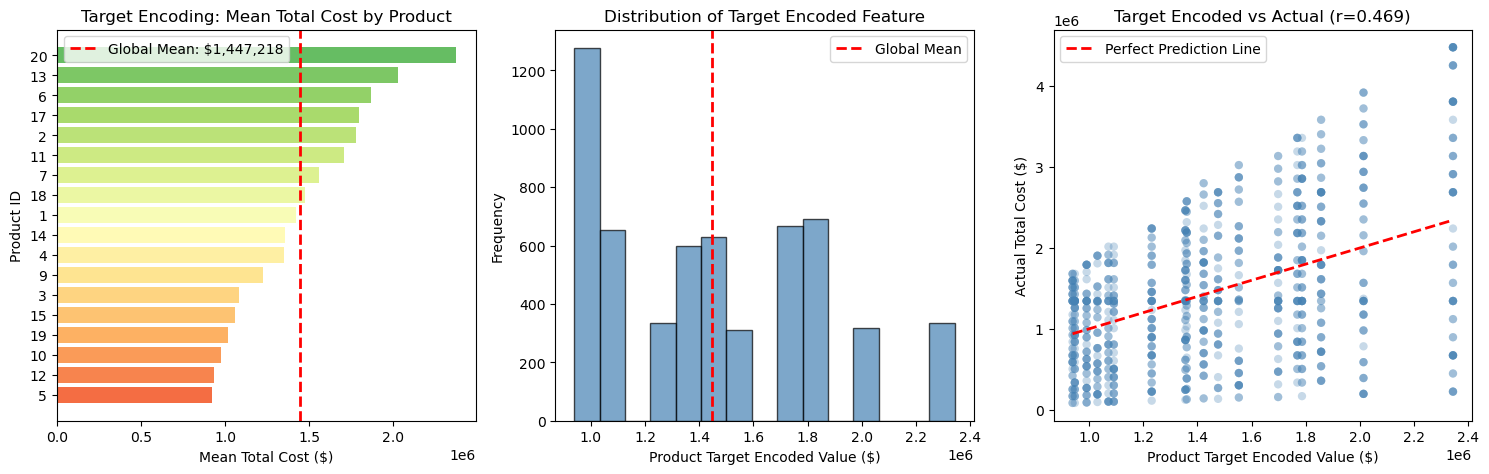


FEATURE ENGINEERING SUMMARY

FEATURE CREATED: Product_TargetEncoded

TECHNIQUE USED: Target Encoding (Mean Encoding)

DESCRIPTION:
  - Each Product_ID is encoded with the mean Total_Cost of all transactions
    involving that product
  - Smoothing applied to prevent overfitting for low-frequency products
  - Formula: (count × category_mean + smoothing × global_mean) / (count + smoothing)

WHY THIS HELPS PREDICT CUSTOMER PURCHASE BEHAVIOR:
  1. Captures inherent product value patterns
  2. Products with higher target encoding tend to be associated with 
     larger purchases (premium products, bulk-ordered items)
  3. Enables the model to learn product-level purchase tendencies
  4. Reduces dimensionality compared to One-Hot Encoding (1 column vs 18)
  5. Preserves ordinal relationship based on purchase behavior



Correlation with Target: 0.4690
Feature Range: $938,836.91 to $2,343,629.50

Featured dataset saved to: transactions_with_target_encoding.csv
Encoding map saved to: product_

In [75]:
# =============================================================================
# FEATURE ENGINEERING: TARGET ENCODING FOR PRODUCT_ID
# =============================================================================

print("=" * 80)
print("FEATURE ENGINEERING: TARGET ENCODING FOR PRODUCT_ID")
print("=" * 80)

# -----------------------------------------------------------------------------
# Prepare the data for Target Encoding
# -----------------------------------------------------------------------------
print("\n" + "-" * 80)
print("DATA PREPARATION")
print("-" * 80)

# Create a copy of the cleaned transactions data for feature engineering
df_featured = transactions_cleaned.copy()

print(f"\nWorking with {len(df_featured)} cleaned transactions")
print(f"Number of unique products: {df_featured['Product_ID'].nunique()}")
print(f"Target variable (Total_Cost) statistics:")
print(f"  Mean:   ${df_featured['Total_Cost'].mean():,.2f}")
print(f"  Median: ${df_featured['Total_Cost'].median():,.2f}")
print(f"  Std:    ${df_featured['Total_Cost'].std():,.2f}")

# -----------------------------------------------------------------------------
# Calculate Target Encoding (Mean Encoding)
# -----------------------------------------------------------------------------
print("\n" + "-" * 80)
print("TARGET ENCODING CALCULATION")
print("-" * 80)

# Calculate the mean Total_Cost for each Product_ID
# This represents the average purchase value associated with each product
product_target_encoding = df_featured.groupby('Product_ID')['Total_Cost'].agg(['mean', 'count', 'std'])
product_target_encoding.columns = ['Mean_Total_Cost', 'Transaction_Count', 'Std_Total_Cost']
product_target_encoding = product_target_encoding.reset_index()

print("\nTarget Encoding Map (Mean Total_Cost per Product):")
print("-" * 60)
display(product_target_encoding.sort_values('Mean_Total_Cost', ascending=False))

# Create the encoding dictionary
target_encoding_map = dict(zip(
    product_target_encoding['Product_ID'], 
    product_target_encoding['Mean_Total_Cost']
))

# -----------------------------------------------------------------------------
# Apply Target Encoding with Smoothing (to prevent overfitting)
# -----------------------------------------------------------------------------
print("\n" + "-" * 80)
print("APPLYING TARGET ENCODING WITH SMOOTHING")
print("-" * 80)

# Global mean for smoothing
global_mean = df_featured['Total_Cost'].mean()

# Smoothing parameter (higher value = more regularization toward global mean)
# This helps prevent overfitting for products with few transactions
smoothing_factor = 10

print(f"\nGlobal Mean Total_Cost: ${global_mean:,.2f}")
print(f"Smoothing Factor: {smoothing_factor}")

# Calculate smoothed target encoding
# Formula: (count * category_mean + smoothing * global_mean) / (count + smoothing)
def smoothed_target_encoding(product_id):
    if product_id not in target_encoding_map:
        return global_mean
    
    product_data = product_target_encoding[product_target_encoding['Product_ID'] == product_id].iloc[0]
    count = product_data['Transaction_Count']
    category_mean = product_data['Mean_Total_Cost']
    
    smoothed_value = (count * category_mean + smoothing_factor * global_mean) / (count + smoothing_factor)
    return smoothed_value

# Apply the smoothed target encoding
df_featured['Product_TargetEncoded'] = df_featured['Product_ID'].apply(smoothed_target_encoding)

print("\nTarget Encoding applied successfully!")
print(f"\nNew Feature Statistics (Product_TargetEncoded):")
print(f"  Min:    ${df_featured['Product_TargetEncoded'].min():,.2f}")
print(f"  Max:    ${df_featured['Product_TargetEncoded'].max():,.2f}")
print(f"  Mean:   ${df_featured['Product_TargetEncoded'].mean():,.2f}")
print(f"  Std:    ${df_featured['Product_TargetEncoded'].std():,.2f}")

# -----------------------------------------------------------------------------
# Validate the Feature Engineering
# -----------------------------------------------------------------------------
print("\n" + "-" * 80)
print("FEATURE VALIDATION & ANALYSIS")
print("-" * 80)

# Check correlation between new feature and target
correlation = df_featured['Product_TargetEncoded'].corr(df_featured['Total_Cost'])
print(f"\nCorrelation Analysis:")
print(f"  Correlation between Product_TargetEncoded and Total_Cost: {correlation:.4f}")

if correlation > 0.3:
    print("  → Strong positive relationship detected - feature is predictive!")
elif correlation > 0.1:
    print("  → Moderate positive relationship - feature adds value")
else:
    print("  → Weak relationship - consider additional features")

# Show sample of the featured data
print("\nSample of Featured Data:")
print("-" * 60)
sample_cols = ['Transaction_ID', 'Company_ID', 'Product_ID', 'Quantity', 
               'Total_Cost', 'Product_TargetEncoded']
display(df_featured[sample_cols].head(10))

# -----------------------------------------------------------------------------
# Visualization of Target Encoding
# -----------------------------------------------------------------------------
print("\n" + "-" * 80)
print("VISUALIZATION")
print("-" * 80)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot 1: Target Encoded Values by Product
ax1 = axes[0]
product_encoding_sorted = product_target_encoding.sort_values('Mean_Total_Cost', ascending=True)
colors = plt.cm.RdYlGn(np.linspace(0.2, 0.8, len(product_encoding_sorted)))
bars = ax1.barh(product_encoding_sorted['Product_ID'].astype(int).astype(str), 
                product_encoding_sorted['Mean_Total_Cost'], color=colors)
ax1.axvline(x=global_mean, color='red', linestyle='--', linewidth=2, label=f'Global Mean: ${global_mean:,.0f}')
ax1.set_xlabel('Mean Total Cost ($)')
ax1.set_ylabel('Product ID')
ax1.set_title('Target Encoding: Mean Total Cost by Product')
ax1.legend()

# Plot 2: Distribution of Target Encoded Feature
ax2 = axes[1]
ax2.hist(df_featured['Product_TargetEncoded'], bins=15, edgecolor='black', alpha=0.7, color='steelblue')
ax2.axvline(x=global_mean, color='red', linestyle='--', linewidth=2, label=f'Global Mean')
ax2.set_xlabel('Product Target Encoded Value ($)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Target Encoded Feature')
ax2.legend()

# Plot 3: Scatter plot - Target Encoded vs Actual Total Cost
ax3 = axes[2]
sample_size = min(1000, len(df_featured))
sample_df = df_featured.sample(n=sample_size, random_state=42)
ax3.scatter(sample_df['Product_TargetEncoded'], sample_df['Total_Cost'], 
            alpha=0.3, c='steelblue', edgecolors='none')
ax3.plot([df_featured['Product_TargetEncoded'].min(), df_featured['Product_TargetEncoded'].max()],
         [df_featured['Product_TargetEncoded'].min(), df_featured['Product_TargetEncoded'].max()],
         'r--', linewidth=2, label='Perfect Prediction Line')
ax3.set_xlabel('Product Target Encoded Value ($)')
ax3.set_ylabel('Actual Total Cost ($)')
ax3.set_title(f'Target Encoded vs Actual (r={correlation:.3f})')
ax3.legend()

plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------------
# Summary & Export
# -----------------------------------------------------------------------------
print("\n" + "=" * 80)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 80)

print("""
FEATURE CREATED: Product_TargetEncoded

TECHNIQUE USED: Target Encoding (Mean Encoding)

DESCRIPTION:
  - Each Product_ID is encoded with the mean Total_Cost of all transactions
    involving that product
  - Smoothing applied to prevent overfitting for low-frequency products
  - Formula: (count × category_mean + smoothing × global_mean) / (count + smoothing)

WHY THIS HELPS PREDICT CUSTOMER PURCHASE BEHAVIOR:
  1. Captures inherent product value patterns
  2. Products with higher target encoding tend to be associated with 
     larger purchases (premium products, bulk-ordered items)
  3. Enables the model to learn product-level purchase tendencies
  4. Reduces dimensionality compared to One-Hot Encoding (1 column vs 18)
  5. Preserves ordinal relationship based on purchase behavior

""")

print(f"\nCorrelation with Target: {correlation:.4f}")
print(f"Feature Range: ${df_featured['Product_TargetEncoded'].min():,.2f} to ${df_featured['Product_TargetEncoded'].max():,.2f}")

# Save the featured dataset
df_featured.to_csv('transactions_with_target_encoding.csv', index=False)
print("\nFeatured dataset saved to: transactions_with_target_encoding.csv")

# Also save the encoding map for future use
encoding_df = product_target_encoding.copy()
encoding_df['Smoothed_Encoding'] = encoding_df['Product_ID'].apply(smoothed_target_encoding)
encoding_df.to_csv('product_target_encoding_map.csv', index=False)
print("Encoding map saved to: product_target_encoding_map.csv")

print("\n" + "=" * 80)
print("FEATURE ENGINEERING COMPLETE!")
print("=" * 80)

print(f"\nData is now ready for camu submission!")